<a href="https://colab.research.google.com/github/jay94lee/IBM-certificate/blob/main/Object_detection_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install and Import Dependencies**

In [ ]:
!pip3 install torch torchvision torchaudio


In [ ]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 17.95 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.


In [ ]:

!pip install -r '/content/yolov5/requirements.txt'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 2. Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-11 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 133MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Make Detections with Images

In [ ]:
img = 'https://imengine.prod.srp.navigacloud.com/?uuid=6603EBF6-20D8-483C-AE64-8FA540E611EF&type=primary&q=72&width=1024'

In [ ]:
results = model(img)
results.print()

image 1/1: 694x1023 4 persons, 1 car, 1 fire hydrant, 2 stop signs, 1 backpack
Speed: 735.8ms pre-process, 117.3ms inference, 49.1ms NMS per image at shape (1, 3, 448, 640)


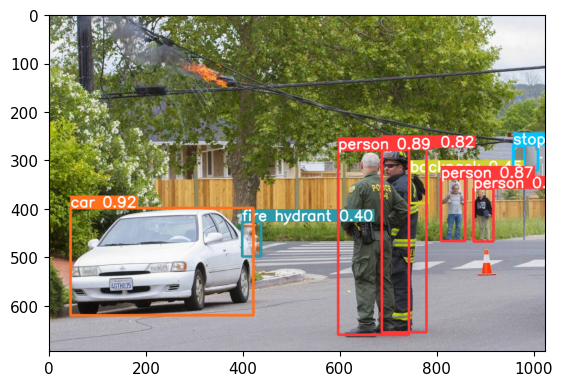

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()


[array([[[110, 137,  82],
         [123, 150,  97],
         [126, 148,  99],
         ...,
         [229, 232, 239],
         [229, 232, 239],
         [229, 232, 239]],
 
        [[118, 145,  92],
         [110, 137,  84],
         [108, 130,  83],
         ...,
         [229, 232, 239],
         [229, 232, 239],
         [229, 232, 239]],
 
        [[115, 142,  91],
         [123, 149, 101],
         [149, 170, 127],
         ...,
         [229, 232, 239],
         [229, 232, 239],
         [229, 232, 239]],
 
        ...,
 
        [[171, 169, 180],
         [168, 166, 177],
         [179, 177, 188],
         ...,
         [165, 163, 174],
         [166, 164, 175],
         [167, 165, 176]],
 
        [[171, 169, 180],
         [170, 168, 179],
         [182, 180, 191],
         ...,
         [170, 168, 179],
         [171, 169, 180],
         [172, 170, 181]],
 
        [[173, 171, 182],
         [172, 170, 181],
         [184, 182, 193],
         ...,
         [172, 170, 181],
  

# **4. Train from scratch**

In [ ]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import shutil as sh
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/project_cctv_detection

!unzip -qq "/content/drive/MyDrive/project_cctv_detection/fire.zip"

/content/drive/MyDrive/project_cctv_detection
replace fire/train/images/00980a5f319aec67.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
len(os.listdir(os.path.join('/content/drive/MyDrive/project_cctv_detection/fire/train', 'labels')))


3522

In [ ]:
with open('/content/yolov5/fireconfig.yaml', 'w+') as f:
    f.write('path: /content/drive/MyDrive/project_cctv_detection/fire\n')
    f.write('train: train/images\n')
    f.write('val: val/images\n\n')
    f.write('names:\n')
    f.write('  0: fire')

In [ ]:
%cd '/content/yolov5/'


/content/yolov5


In [ ]:
!python train.py --img 676 --batch 16 --epochs 20 --data fireconfig.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=fireconfig.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=676, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

# 5. Load Custom Model

In [ ]:
os.listdir(os.path.join('/content/yolov5', 'runs', 'train'))


['exp']

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-9-27 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
img = os.path.join('/content/drive/MyDrive/project_cctv_detection/fire/train', 'images', '920d982a31a6db19.jpg')
results = model(img)
results.print()

image 1/1: 1024x774 1 fire
Speed: 34.9ms pre-process, 123.7ms inference, 4.4ms NMS per image at shape (1, 3, 640, 512)


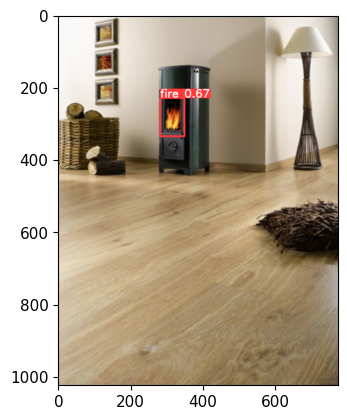

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
img = 'https://imengine.prod.srp.navigacloud.com/?uuid=6603EBF6-20D8-483C-AE64-8FA540E611EF&type=primary&q=72&width=1024'

results = model(img)
results.print()

%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../input.mp4


In [ ]:

import cv2
vidcap = cv2.VideoCapture('runs/detect/exp2/input.mp4')
success,image = vidcap.read()
images = []
while success:
    success,image = vidcap.read()
    if success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

In [ ]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt

rc('animation', html='jshtml')

def create_animation(ims):
    fig = plt.figure(figsize=(9, 9))
    plt.axis('off')
    im = plt.imshow(ims[0])

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//12)

create_animation(images)